# `LINEAR REGRESSION`

`IMPORTING LIBRARIES`

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 

`READING DATASET`

In [10]:
dataset = pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')

In [11]:
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


DROP day,month,year

In [12]:
dataset = dataset.drop(columns=['day','month','year'])

In [13]:
dataset.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


REPLACING CLASS VALUES WITH 0 AND 1 

In [15]:
dataset['Classes'].value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [16]:
dataset['Classes'] = np.where(dataset['Classes'].str.contains('not fire'),0,1)

In [17]:
dataset.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [19]:
dataset['Classes'].value_counts()

1    137
0    106
Name: Classes, dtype: int64

`DIVIDE THE DATASET INTO INDEPENDENT AND DEPENDENT FEATURES`

In [26]:
X = dataset.drop('FWI',axis=1)
y = dataset['FWI']
X,y

(     Temperature  RH  Ws  Rain  FFMC   DMC    DC  ISI   BUI  Classes  Region
 0             29  57  18   0.0  65.7   3.4   7.6  1.3   3.4        0       0
 1             29  61  13   1.3  64.4   4.1   7.6  1.0   3.9        0       0
 2             26  82  22  13.1  47.1   2.5   7.1  0.3   2.7        0       0
 3             25  89  13   2.5  28.6   1.3   6.9  0.0   1.7        0       0
 4             27  77  16   0.0  64.8   3.0  14.2  1.2   3.9        0       0
 ..           ...  ..  ..   ...   ...   ...   ...  ...   ...      ...     ...
 238           30  65  14   0.0  85.4  16.0  44.5  4.5  16.9        1       1
 239           28  87  15   4.4  41.1   6.5   8.0  0.1   6.2        0       1
 240           27  87  29   0.5  45.9   3.5   7.9  0.4   3.4        0       1
 241           24  54  18   0.1  79.7   4.3  15.2  1.7   5.1        0       1
 242           24  64  15   0.2  67.3   3.8  16.5  1.2   4.8        0       1
 
 [243 rows x 11 columns],
 0      0.5
 1      0.4
 2      0.1


`DIVIDING THE DATA INTO  TRAIN AND TEST DATA `

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [28]:
X_train.shape,y_train.shape

((182, 11), (182,))

`VISUALIZATION OF CORRELATION BETWEEN INDEPENDENT VARIABLES`

In [29]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<AxesSubplot:>

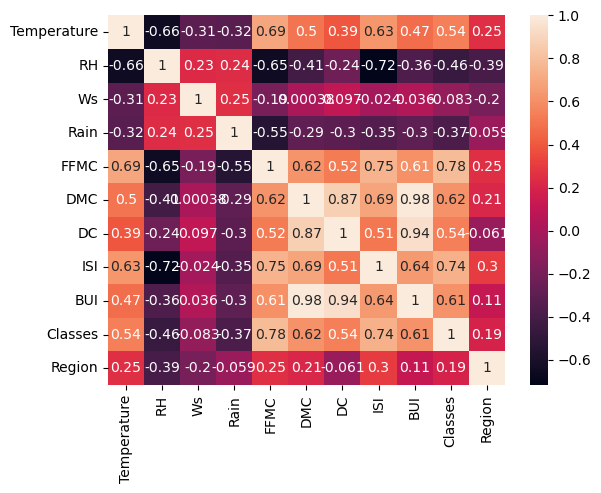

In [30]:
sns.heatmap(X_train.corr(),annot=True)

FROM THE DOMAIN EXPERT : Threshold is 0.85.

This means if the correlation is equal or greater than threshold we can remove those independent features.

In [31]:
dataset.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


In [34]:
len(dataset.columns)

12

In [36]:
len(dataset.corr())

12

In [54]:
def correlation(dataset,threshold):
    correlation_matrix = dataset.corr()
    correlation_features = set()
    for i in range(dataset.corr().shape[0]):
        for j in range(dataset.corr().shape[1]):
            if abs(dataset.iloc[i,j]) > threshold:
                coulumn_name = correlation_matrix[i]
                correlation_features.add(column_name)
                
    return correlation_features

In [55]:
dataset.corr().shape

(12, 12)

In [56]:
dataset.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [58]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
    

In [59]:
correlation(X_train,0.85)

{'BUI', 'DC'}

`DROPPING BUI AND DC`

In [60]:
X_train = X_train.drop(columns=['BUI','DC'])

In [61]:
X_test = X_test.drop(columns=['BUI','DC'])

In [62]:
X_train.shape,X_test.shape

((182, 9), (61, 9))

`STANDARDIZATION OF INDEPENDENT FEATURES`

In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [67]:
X_train_scaled,X_test_scaled

(array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
         -1.10431526, -0.98907071],
        [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
         -1.10431526,  1.01105006],
        [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
          0.90553851,  1.01105006],
        ...,
        [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
         -1.10431526, -0.98907071],
        [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
          0.90553851,  1.01105006],
        [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
         -1.10431526, -0.98907071]]),
 array([[-3.01758418e-01,  1.15223531e-01, -2.19053977e-01,
         -3.84060174e-01,  6.33218240e-01, -4.25075679e-02,
          2.03772218e-01,  9.05538514e-01, -9.89070710e-01],
        [ 2.39325642e-01, -5.52632606e-01, -9.78441098e-01,
         -3.84060174e-01,  7.37980727e-01, -3.83352062e-01,
          3.65823283e-01,  9.05538514e-01, -9.89070710e-01],
        [-1

`LINEAR REGRESSION`

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

Mean absolute error :0.5468236465249988 , r2_score : 0.9847657384266951


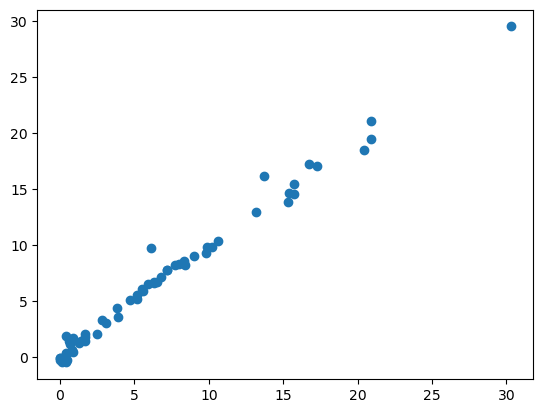

In [69]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train_scaled,y_train)

y_pred = linear_regressor.predict(X_test_scaled)

mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)

print(f'Mean absolute error :{mae} , r2_score : {score}')

plt.scatter(y_test,y_pred)

In [75]:
linear_regressor.coef_

array([-0.03634495, -0.17441065,  0.00703214, -0.04108155, -0.82319823,
        3.6982583 ,  4.84057298,  0.40422124, -0.39259928])

# LASSO REGRESSION

MAE : 1.1331759949144087  r2_scre : 0.9492020263112388


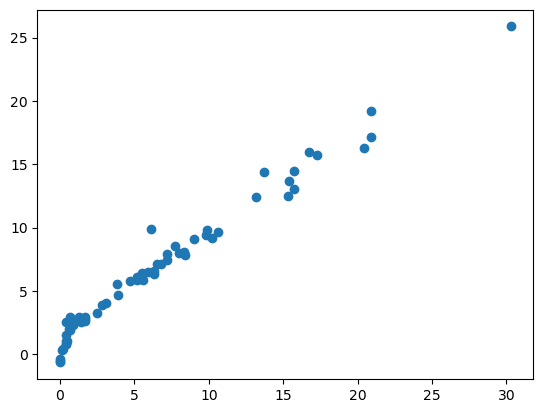

In [71]:
from sklearn.linear_model import Lasso
lasso_regressor = Lasso()

lasso_regressor.fit(X_train_scaled,y_train)

y_pred = lasso_regressor.predict(X_test_scaled)

mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)

print(f'MAE : {mae}  r2_scre : {score}')
plt.scatter(y_test,y_pred)

In [76]:
lasso_regressor.coef_

array([ 0.        , -0.        ,  0.        , -0.        ,  0.        ,
        2.99025157,  4.00824747,  0.        , -0.        ])

In [80]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)

LassoCV(cv=5)

 mae : 0.6199701158263436  r_squared :0.9820946715928274


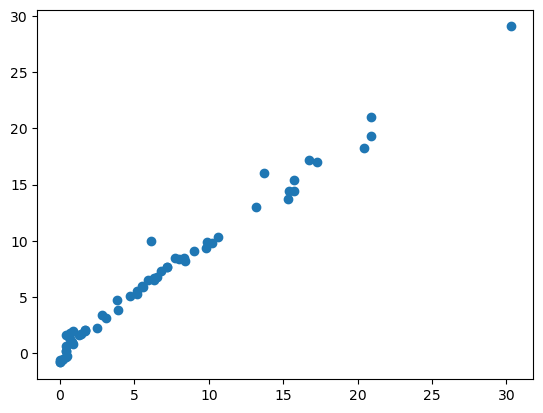

In [81]:
y_pred = lassocv.predict(X_test_scaled)

mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)

print(f' mae : {mae}  r_squared :{score}')

plt.scatter(y_test,y_pred)

In [82]:
lassocv.coef_

array([-0.        , -0.        ,  0.        ,  0.        , -0.40063928,
        3.60177292,  4.7999393 ,  0.16408964, -0.3022766 ])

# RIDGE REGRESSION

mae : 0.5642305340105683 , r_squared : 0.9842993364555513


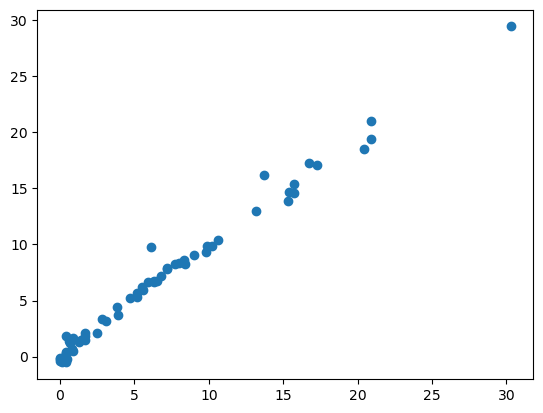

In [88]:
from sklearn.linear_model import Ridge
ridge = Ridge()

ridge.fit(X_train_scaled,y_train)

y_pred = ridge.predict(X_test_scaled)

mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)

print(f'mae : {mae} , r_squared : {score}')
plt.scatter(y_test,y_pred)

In [89]:
ridge.coef_

array([-0.02692577, -0.20519212,  0.02554428, -0.04069202, -0.78583006,
        3.68286744,  4.74488835,  0.43423672, -0.38466214])

mae : 0.5642305340105683  r_squared : 0.9842993364555513


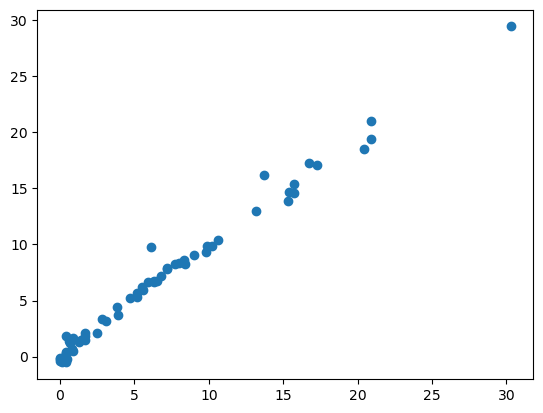

In [91]:
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(cv=10)
ridgecv.fit(X_train_scaled,y_train)

y_pred = ridgecv.predict(X_test_scaled)

mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)

print(f'mae : {mae}  r_squared : {score}')

plt.scatter(y_test,y_pred)

In [92]:
ridgecv.coef_

array([-0.02692577, -0.20519212,  0.02554428, -0.04069202, -0.78583006,
        3.68286744,  4.74488835,  0.43423672, -0.38466214])

In [94]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': array([ 0.1,  1. , 10. ]),
 'cv': 10,
 'fit_intercept': True,
 'gcv_mode': None,
 'normalize': 'deprecated',
 'scoring': None,
 'store_cv_values': False}

# ELASTIC NET REGRESSION

mae :1.8822353634896  r_squared  :0.8753460589519703


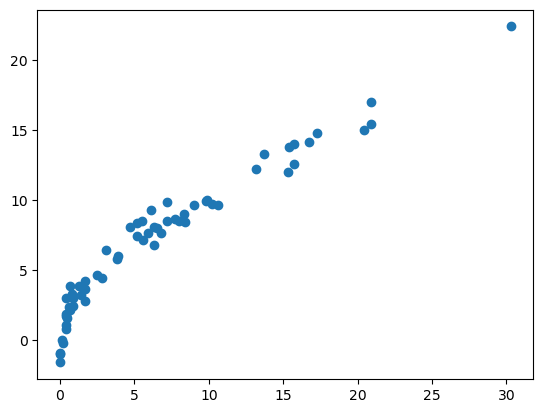

In [95]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()

elastic.fit(X_train_scaled,y_train)

y_pred = elastic.predict(X_test_scaled)

mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)

print(f'mae :{mae}  r_squared  :{score}')

plt.scatter(y_test,y_pred)

In [96]:
elastic.coef_

array([ 0.21700498, -0.46785751,  0.        , -0.        ,  0.37217213,
        2.36758116,  2.35779601,  0.87026661,  0.        ])